In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [7]:
df_delivery=pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/Datasets/delivery.csv')
df_matches=pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/Datasets/matches.csv')
df_orange=pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/Datasets/orange_cap.csv')

In [8]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [9]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   team1            1095 non-null   object
 7   team2            1095 non-null   object
 8   toss_winner      1095 non-null   object
 9   toss_decision    1095 non-null   object
 10  winner           1095 non-null   object
 11  result           1095 non-null   object
 12  result_margin    1095 non-null   object
 13  target_runs      1095 non-null   object
 14  target_overs     1095 non-null   object
 15  super_over       1095 non-null   object
 16  method           1095 non-null   object
 17  umpire1          1095 non-null   

In [10]:
df_orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         268 non-null    object 
 1   Season         268 non-null    object 
 2   Matches        268 non-null    int64  
 3   Innings        268 non-null    int64  
 4   Not Outs       268 non-null    object 
 5   Runs           268 non-null    object 
 6   Highest Score  268 non-null    object 
 7   Average        268 non-null    float64
 8   Balls Faced    268 non-null    int64  
 9   Strike Rate    268 non-null    float64
 10  100s           268 non-null    object 
 11  50s            268 non-null    object 
 12  Ducks          268 non-null    object 
 13  Fours          268 non-null    int64  
 14  Sixes          268 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 31.5+ KB


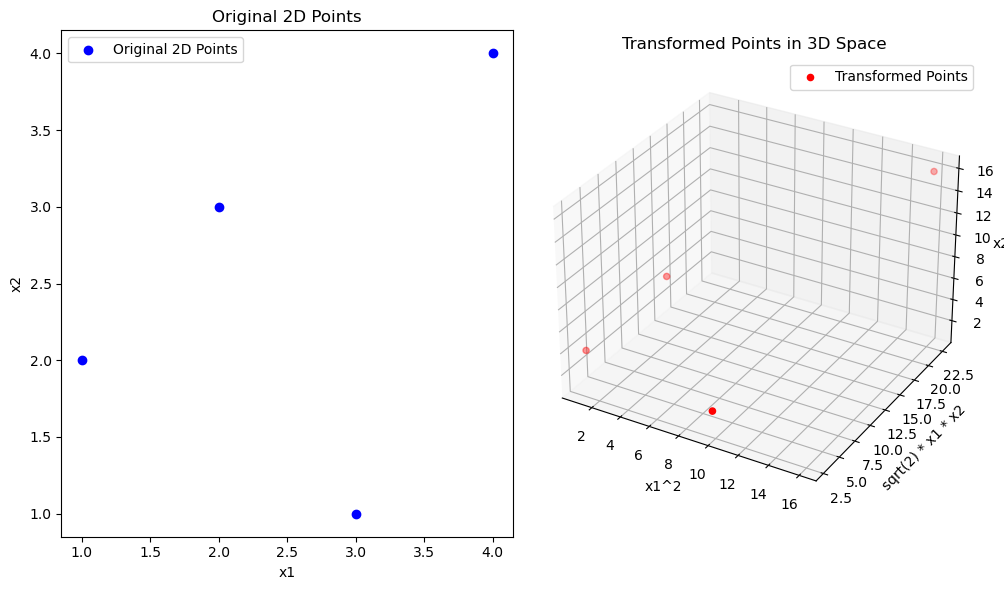

In [13]:
# Define the polynomial kernel transformation with r=1, d=2
def polynomial_kernel_transform(x, r=1, d=2):
    # x is a 2D point, e.g., [x1, x2]
    x1, x2 = x
    return [x1**2, np.sqrt(2)*x1*x2, x2**2]  # Transformation to 3D

# Sample 2D points
points_2d = np.array([[1, 2], [2, 3], [3, 1], [4, 4]])

# Apply the polynomial kernel transformation
transformed_points = np.array([polynomial_kernel_transform(p) for p in points_2d])

# Plot the original 2D points and their transformed 3D points
fig = plt.figure(figsize=(10, 6))

# 2D Plot
ax1 = fig.add_subplot(121)
ax1.scatter(points_2d[:, 0], points_2d[:, 1], c='blue', label='Original 2D Points')
ax1.set_title('Original 2D Points')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# 3D Plot (transformed points)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(transformed_points[:, 0], transformed_points[:, 1], transformed_points[:, 2], c='red', label='Transformed Points')
ax2.set_title('Transformed Points in 3D Space')
ax2.set_xlabel('x1^2')
ax2.set_ylabel('sqrt(2) * x1 * x2')
ax2.set_zlabel('x2^2')
ax2.legend()

plt.tight_layout()
plt.show()


Kernel: linear
Accuracy: 0.9811320754716981
Confusion Matrix: 
[[14  0]
 [ 1 38]]



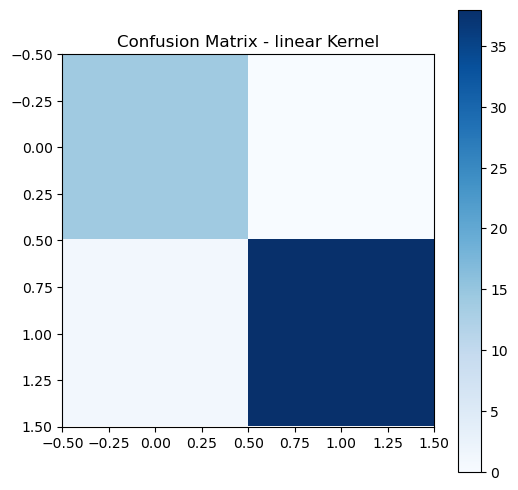

Kernel: poly
Accuracy: 0.9433962264150944
Confusion Matrix: 
[[12  2]
 [ 1 38]]



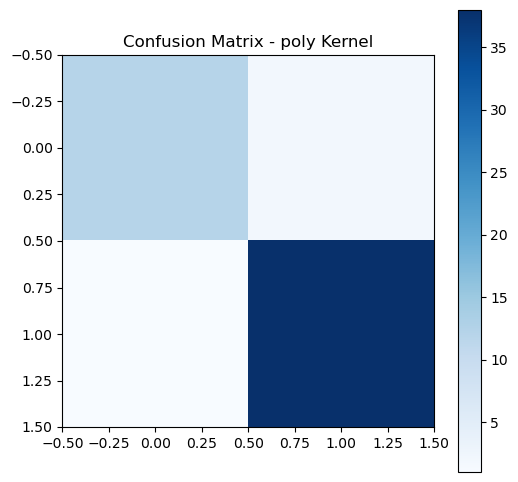

Kernel: rbf
Accuracy: 0.9811320754716981
Confusion Matrix: 
[[14  0]
 [ 1 38]]



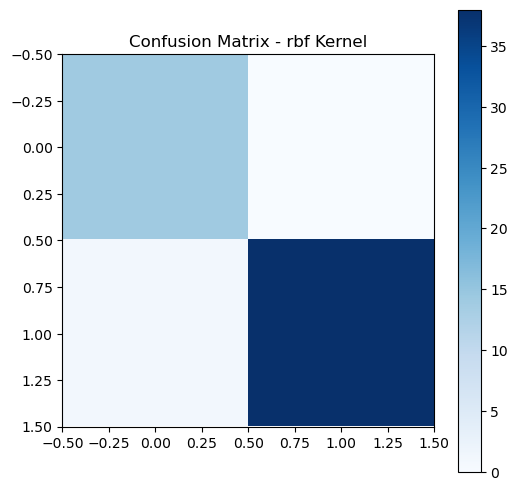

In [17]:
# Handling non-numeric values in 'Runs' column
df_orange['Runs'] = pd.to_numeric(df_orange['Runs'], errors='coerce')  # Convert non-numeric to NaN
df_orange = df_orange.dropna(subset=['Runs'])  # Drop rows where 'Runs' is NaN

# Now apply the binary encoding for the target variable
y = df_orange['Runs']  # Binary or categorical target, e.g., 'Runs > 50'

# Encoding target if necessary
y = y.apply(lambda x: 1 if x > 50 else 0)  # Example for binary classification

# Features
X = df_orange[['Strike Rate', 'Average', 'Fours', 'Sixes']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1)  # C is the regularization parameter
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[kernel] = {'accuracy': accuracy, 'confusion_matrix': cm}

# Visualize the results
for kernel, result in results.items():
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix: \n{result['confusion_matrix']}\n")
    
    # Optionally, visualize decision boundary or confusion matrix
    plt.figure(figsize=(6,6))
    plt.imshow(result['confusion_matrix'], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.colorbar()
    plt.show()

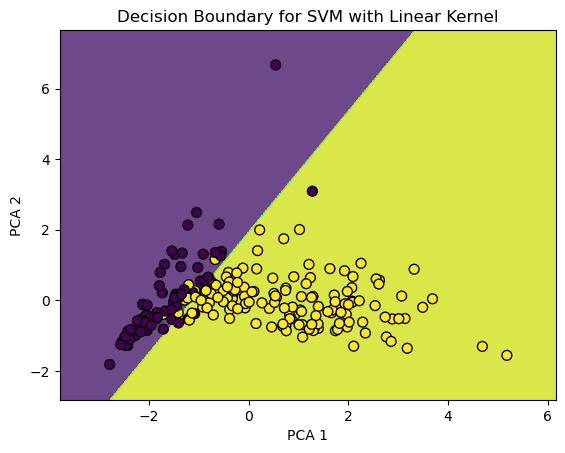

In [27]:
# Reduce dimensions for visualization if needed (using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Train SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_pca, y_train)

# Create grid for decision boundary plot
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the grid to get the decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.title(f"Decision Boundary for SVM with Linear Kernel")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


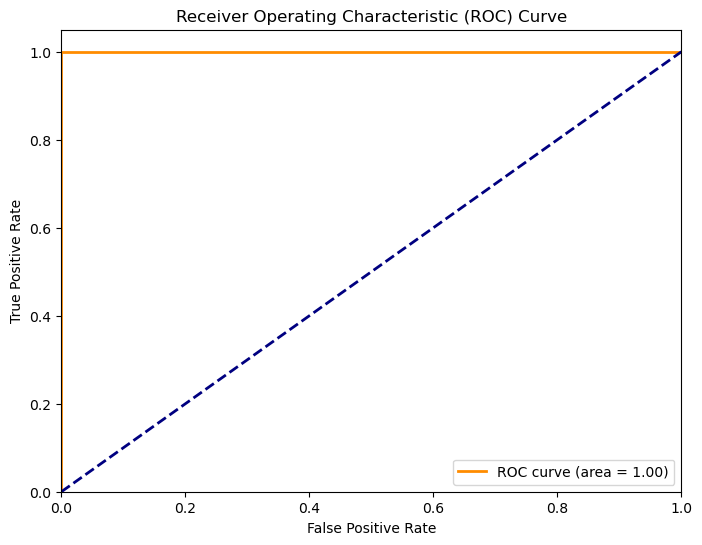

In [25]:
# Train SVM model first
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)  # Ensure model is trained first

# Now get probabilities for the positive class using decision function
y_prob = svm.decision_function(X_test_scaled)

# Compute ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Random Forest Classifier Accuracy: 0.9811320754716981
Confusion Matrix: 
[[14  0]
 [ 1 38]]


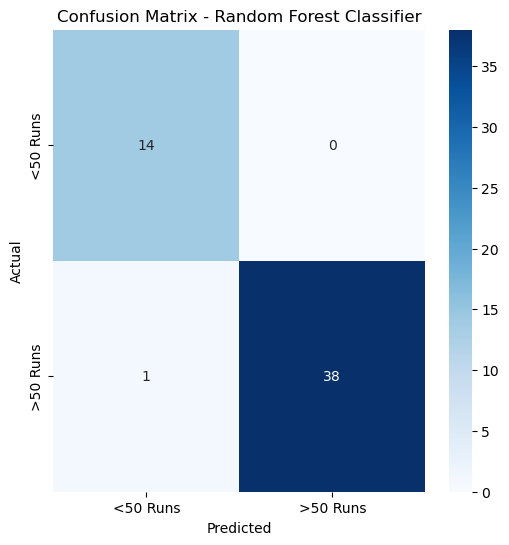

In [29]:
# Handle non-numeric values in the 'Runs' column
df_orange['Runs'] = pd.to_numeric(df_orange['Runs'], errors='coerce')  # Convert non-numeric to NaN
df_orange = df_orange.dropna(subset=['Runs'])  # Drop rows where 'Runs' is NaN

# Encoding target (binary classification: Runs > 50)
y = df_orange['Runs'].apply(lambda x: 1 if x > 50 else 0)  # Target: 1 if Runs > 50, else 0

# Features (independent variables)
X = df_orange[['Strike Rate', 'Average', 'Fours', 'Sixes']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators=100 trees
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Random Forest Classifier Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{cm}")

# Visualize confusion matrix using Seaborn heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<50 Runs', '>50 Runs'], yticklabels=['<50 Runs', '>50 Runs'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


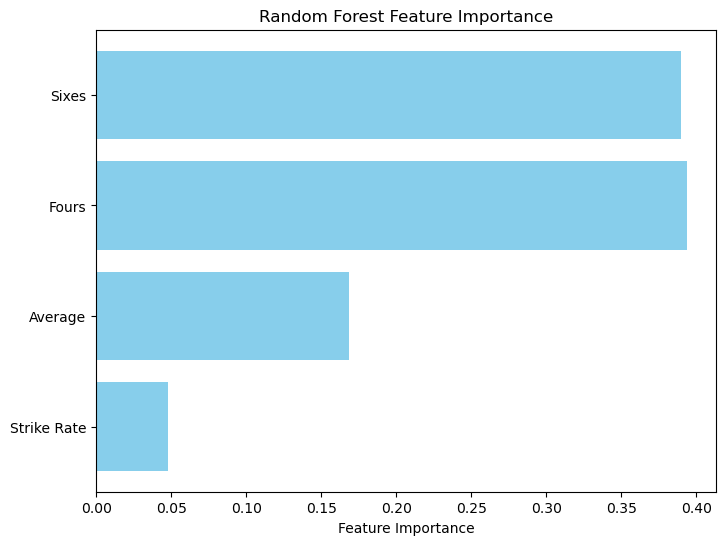

In [38]:
# Assuming you have already split the data into X_train, X_test, y_train, y_test and scaled them
# Define and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)  # Train the model

# Plot feature importance
feature_importance = rf_classifier.feature_importances_
features = X.columns  # Ensure X is the original DataFrame containing feature names

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [32]:
rom sklearn.tree import plot_tree

# Plot a single tree from the random forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=features, class_names=['<=50', '>50'], rounded=True)
plt.title('Single Decision Tree from Random Forest')
plt.show()

SyntaxError: invalid syntax (1284116069.py, line 1)